In [40]:
import pandas as pd
import re
#data = pd.read_csv(r"C:\Users\Dima\Downloads\Right neihbours.csv")
#data=[data["Combo"][i] for i in range(len(data))]
#df = pd.read_csv(r"C:\Users\Dima\Downloads\Right neihbours.csv")

#indicies = [i for i in range(len(df)) if df["result"][i]==1]
#data = [df['Combo'][i] for i in indicies]

data = pd.read_csv(r'words_by_vacancies.csv')
data = [data["0"][i] for i in range(len(data))]


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(data)


In [54]:
#print(vectorizer.get_feature_names())
#print(X.shape)

In [43]:
print(X[0,])

  (0, 342)	0.3030685212754478
  (0, 1353)	0.2950087196738722
  (0, 1406)	0.1539125917367996
  (0, 902)	0.1669227512731549
  (0, 119)	0.4300935502397063
  (0, 302)	0.3210143431280951
  (0, 459)	0.3979315671270236
  (0, 864)	0.20982837891034453
  (0, 519)	0.201586342253244
  (0, 436)	0.26984559872630626
  (0, 291)	0.40706901655798855


In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

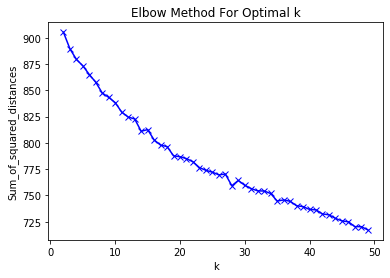

In [45]:
Sum_of_squared_distances = []
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
true_k = 27
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
cl=pd.DataFrame(list(labels),columns=['cluster'])
print(cl.sort_values(by=['cluster']))


     cluster
750        0
27         0
66         0
67         0
682        0
..       ...
53        26
49        26
44        26
486       26
359       26

[986 rows x 1 columns]


Cluster: 0


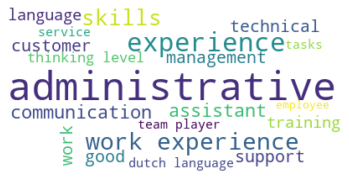

Cluster: 1


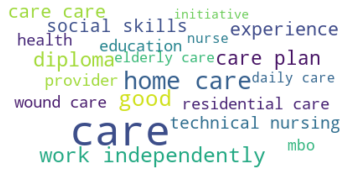

Cluster: 2


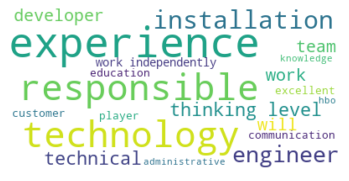

Cluster: 3


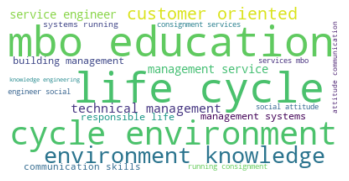

Cluster: 4


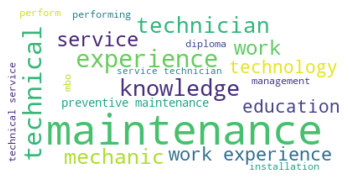

Cluster: 5


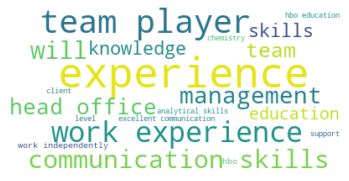

Cluster: 6


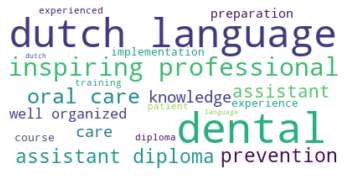

Cluster: 7


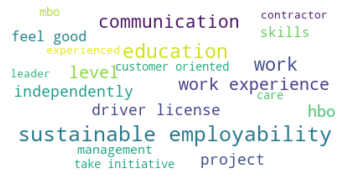

Cluster: 8


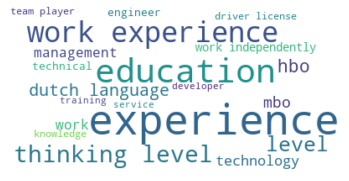

Cluster: 9


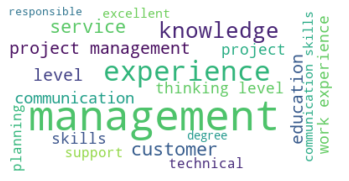

Cluster: 10


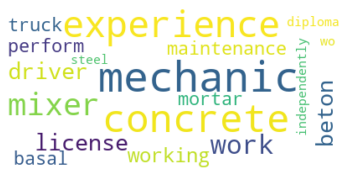

Cluster: 11


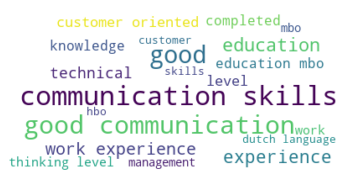

Cluster: 12


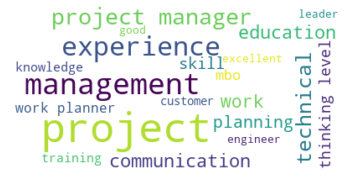

Cluster: 13


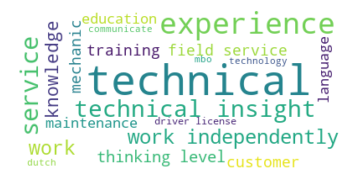

Cluster: 14


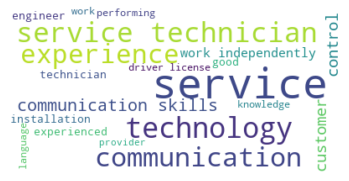

Cluster: 15


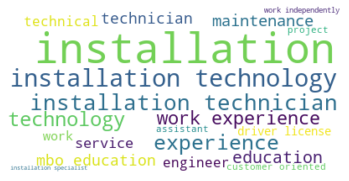

Cluster: 16


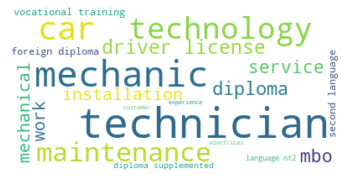

Cluster: 17


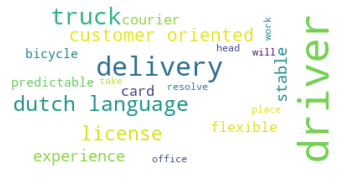

Cluster: 18


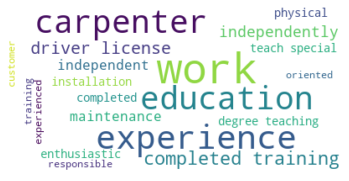

Cluster: 19


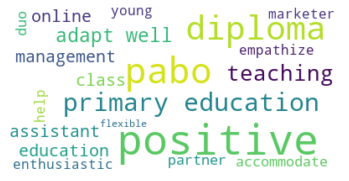

Cluster: 20


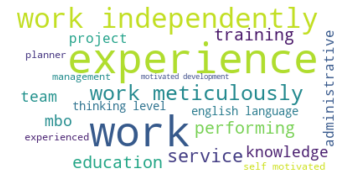

Cluster: 21


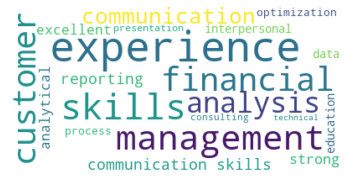

Cluster: 22


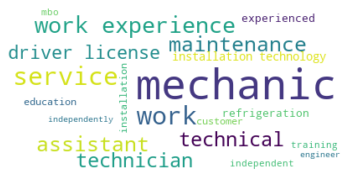

Cluster: 23


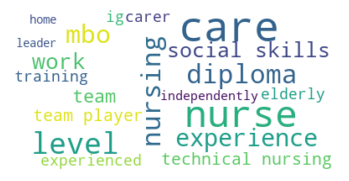

Cluster: 24


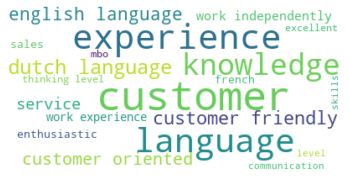

Cluster: 25


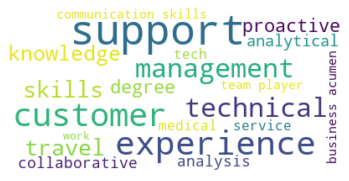

Cluster: 26


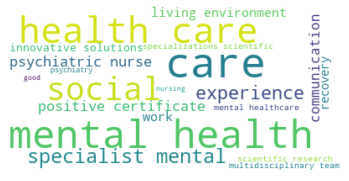

In [53]:
from wordcloud import WordCloud
result={'cluster':labels,'words':data}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['words'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    
   
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [48]:
x = result[result['cluster']==3]
x

,cluster,words
9,3,mediate experience psychosocial counseling dip...
20,3,positive attitude take place very enthusiastic...
28,3,experienced nurse elderly care care provider t...
130,3,dialysis nurse psychological counseling work e...
171,3,excellent assessment mbo diploma daily care dr...
204,3,diploma nursing home care care nurse independe...
207,3,care process nursing training social skills ca...
233,3,positive attitude take place technical nursing...
245,3,acute care personal leadership conducting audi...
248,3,induction process home care driver license cer...


In [25]:
x = result[result['cluster']==6]
x

,cluster,words
9,6,mbo education
13,6,mbo level
16,6,hbo education
28,6,mbo diploma
39,6,university education
...,...,...
2796,6,c level contact
2851,6,vig level 3
2852,6,client education mbo
2854,6,hbo education current


In [27]:
x = result[result['cluster']==9]
x

,cluster,words
0,9,work experience
1,9,have experience
18,9,demonstrable experience
27,9,customer experience
67,9,practical experience
...,...,...
2833,9,hbo level experience
2838,9,chain monitoring experience
2839,9,any technical experience
2849,9,dutch language experience
